In [1]:
import math
g = 9.8   #重力加速度


def observation_time(t0, v0, r0):
    '''
    Return : 初期時刻t0から100秒後の1ms毎の時刻のリストを返す。
    
    Parameters
    ----------
    t0 : 初期時刻
    v0 : 初速度のx成分とz成分をもつ2要素のリスト
    r0 : 初期位置のx成分とz成分をもつ2要素のリスト
    '''
    t_list = []
    tQ = (1/g) * (v0[1] + math.sqrt(v0[1]**2 + 2*g*r0[1])) + t0
    for ms in range(100001):
        if (t0 + ms/1000) > tQ:
            t_list.append(tQ)
            break
        t_list.append(t0 + ms/1000)
    return t_list


def velocity(t, t0, v0):
    '''
    Return: 時刻tにおける速度ベクトルを返す。
    
    Parameters
    ----------
    t  : 任意時刻
    t0 : 初期時刻
    v0 : 初速度のx成分とz成分をもつ2要素のリスト
    '''
    u = v0[0]
    w = -g * (t - t0) + v0[1]
    return [u, w]


def position(t, t0, v0, r0):
    '''
    Return: 時刻tにおける位置ベクトルを返す。
    
    Parameters
    ----------
    t  : 任意時刻
    t0 : 初期時刻
    v0 : 初速度のx成分とz成分をもつ2要素のリスト
    r0 : 初期位置のx成分とz成分をもつ2要素のリスト
    '''
    x = v0[0] * (t - t0) + r0[0]
    z = -(1/2) * g * (t - t0)**2 + v0[1] * (t - t0) + r0[1]
    return [x, z]

    
def motion_list(t0, v0, r0):
    '''
    Return : 初期時刻t0から到達点までの物体の運動の以下のリストを返す：
    Index   物理量
    ------------
      0     初期時刻t0から到達点時刻tQまでの1msec毎の時間リスト
      1     初期時刻t0から到達点時刻tQまでの1msec毎の速度のx成分
      2     初期時刻t0から到達点時刻tQまでの1msec毎の速度のz成分
      3     初期時刻t0から到達点時刻tQまでの1msec毎の位置のx成分
      4     初期時刻t0から到達点時刻tQまでの1msec毎の位置のz成分
      
    Parameters
    ----------
    t0 : 初期時刻
    v0 : 初速度のx成分とz成分をもつ2要素のリスト
    r0 : 初期位置のx成分とz成分をもつ2要素のリスト
    '''
    t_list = observation_time(t0, v0, r0)
    u_list = []
    w_list = []
    x_list = []
    z_list = []
    for sec in t_list:
        u_list.append(velocity(sec, t0, v0)[0])
        w_list.append(velocity(sec, t0, v0)[1])
        x_list.append(position(sec, t0, v0, r0)[0])
        z_list.append(position(sec, t0, v0, r0)[1])
    return [t_list, u_list, w_list, x_list, z_list]

In [2]:
mot = motion_list(7/math.sqrt(2), [21, 7*math.sqrt(2)],  [15, 10])

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

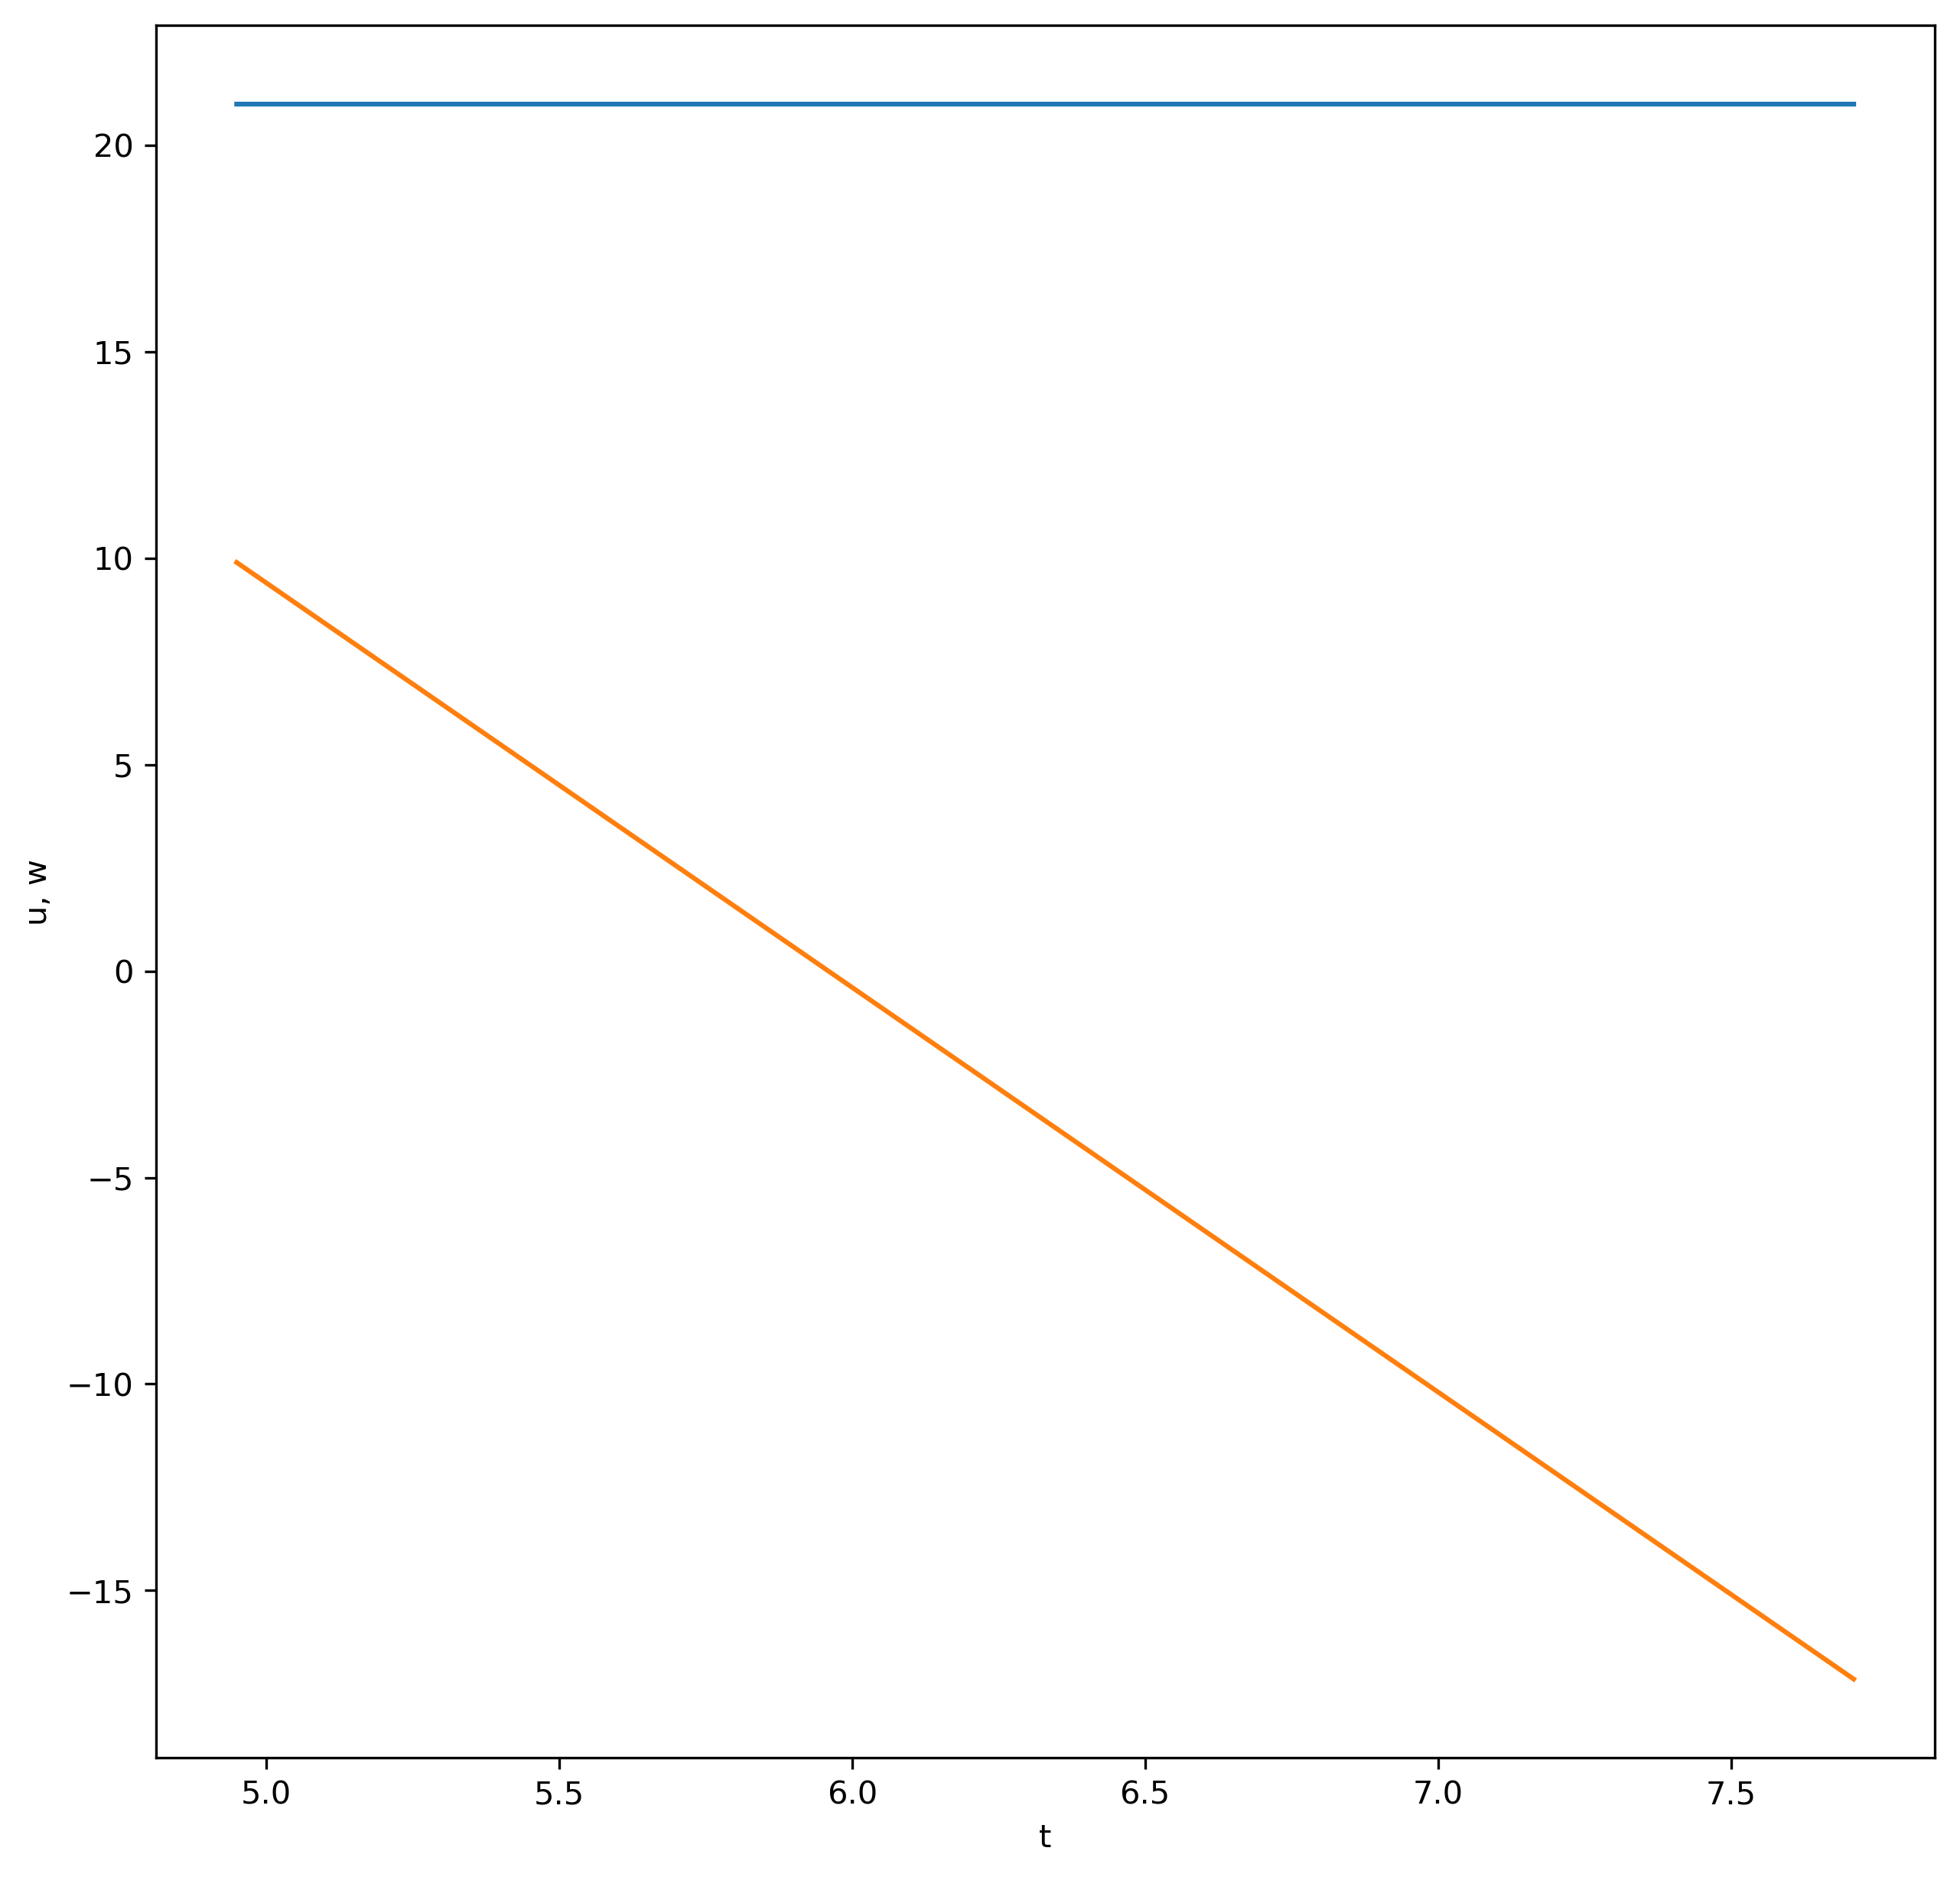

In [4]:
plt.figure(figsize=(10,10),dpi=300)
plt.plot(mot[0], mot[1])
plt.plot(mot[0], mot[2])
plt.xlabel('t')
plt.ylabel('u, w')
plt.show()

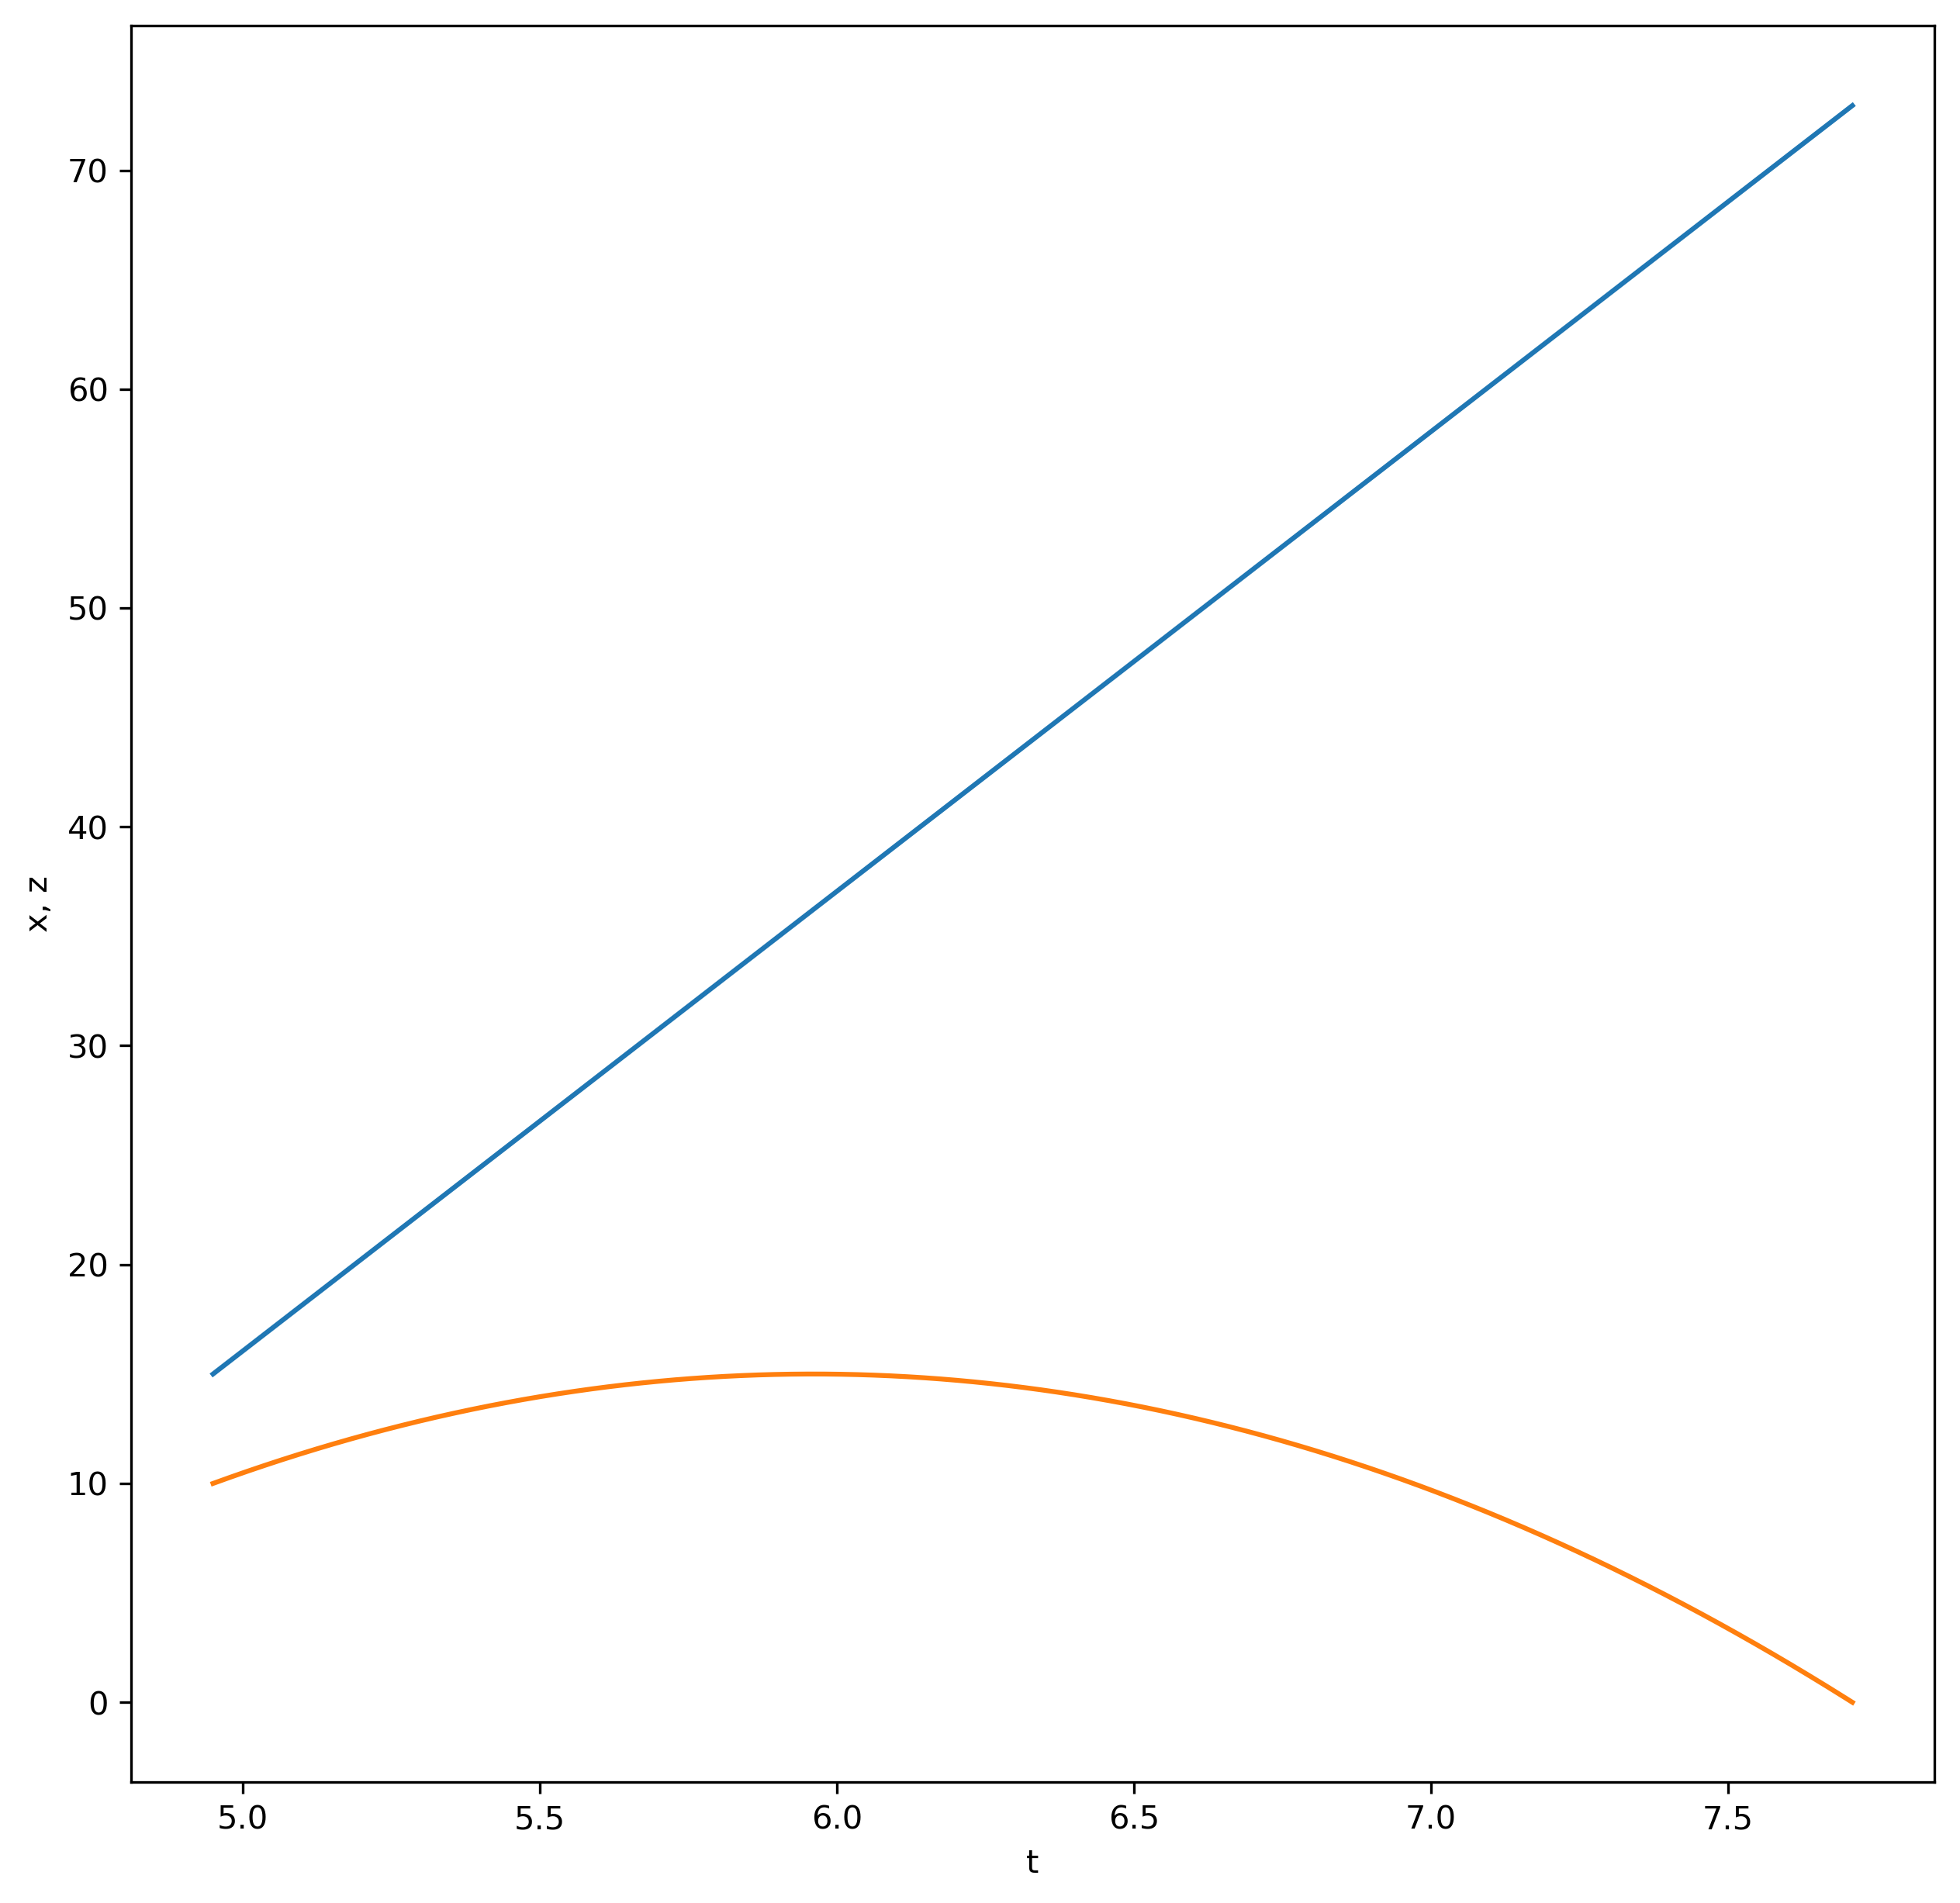

In [5]:
plt.figure(figsize=(10,10),dpi=300)
plt.plot(mot[0], mot[3])
plt.plot(mot[0], mot[4])
plt.xlabel('t')
plt.ylabel('x, z')
plt.show()

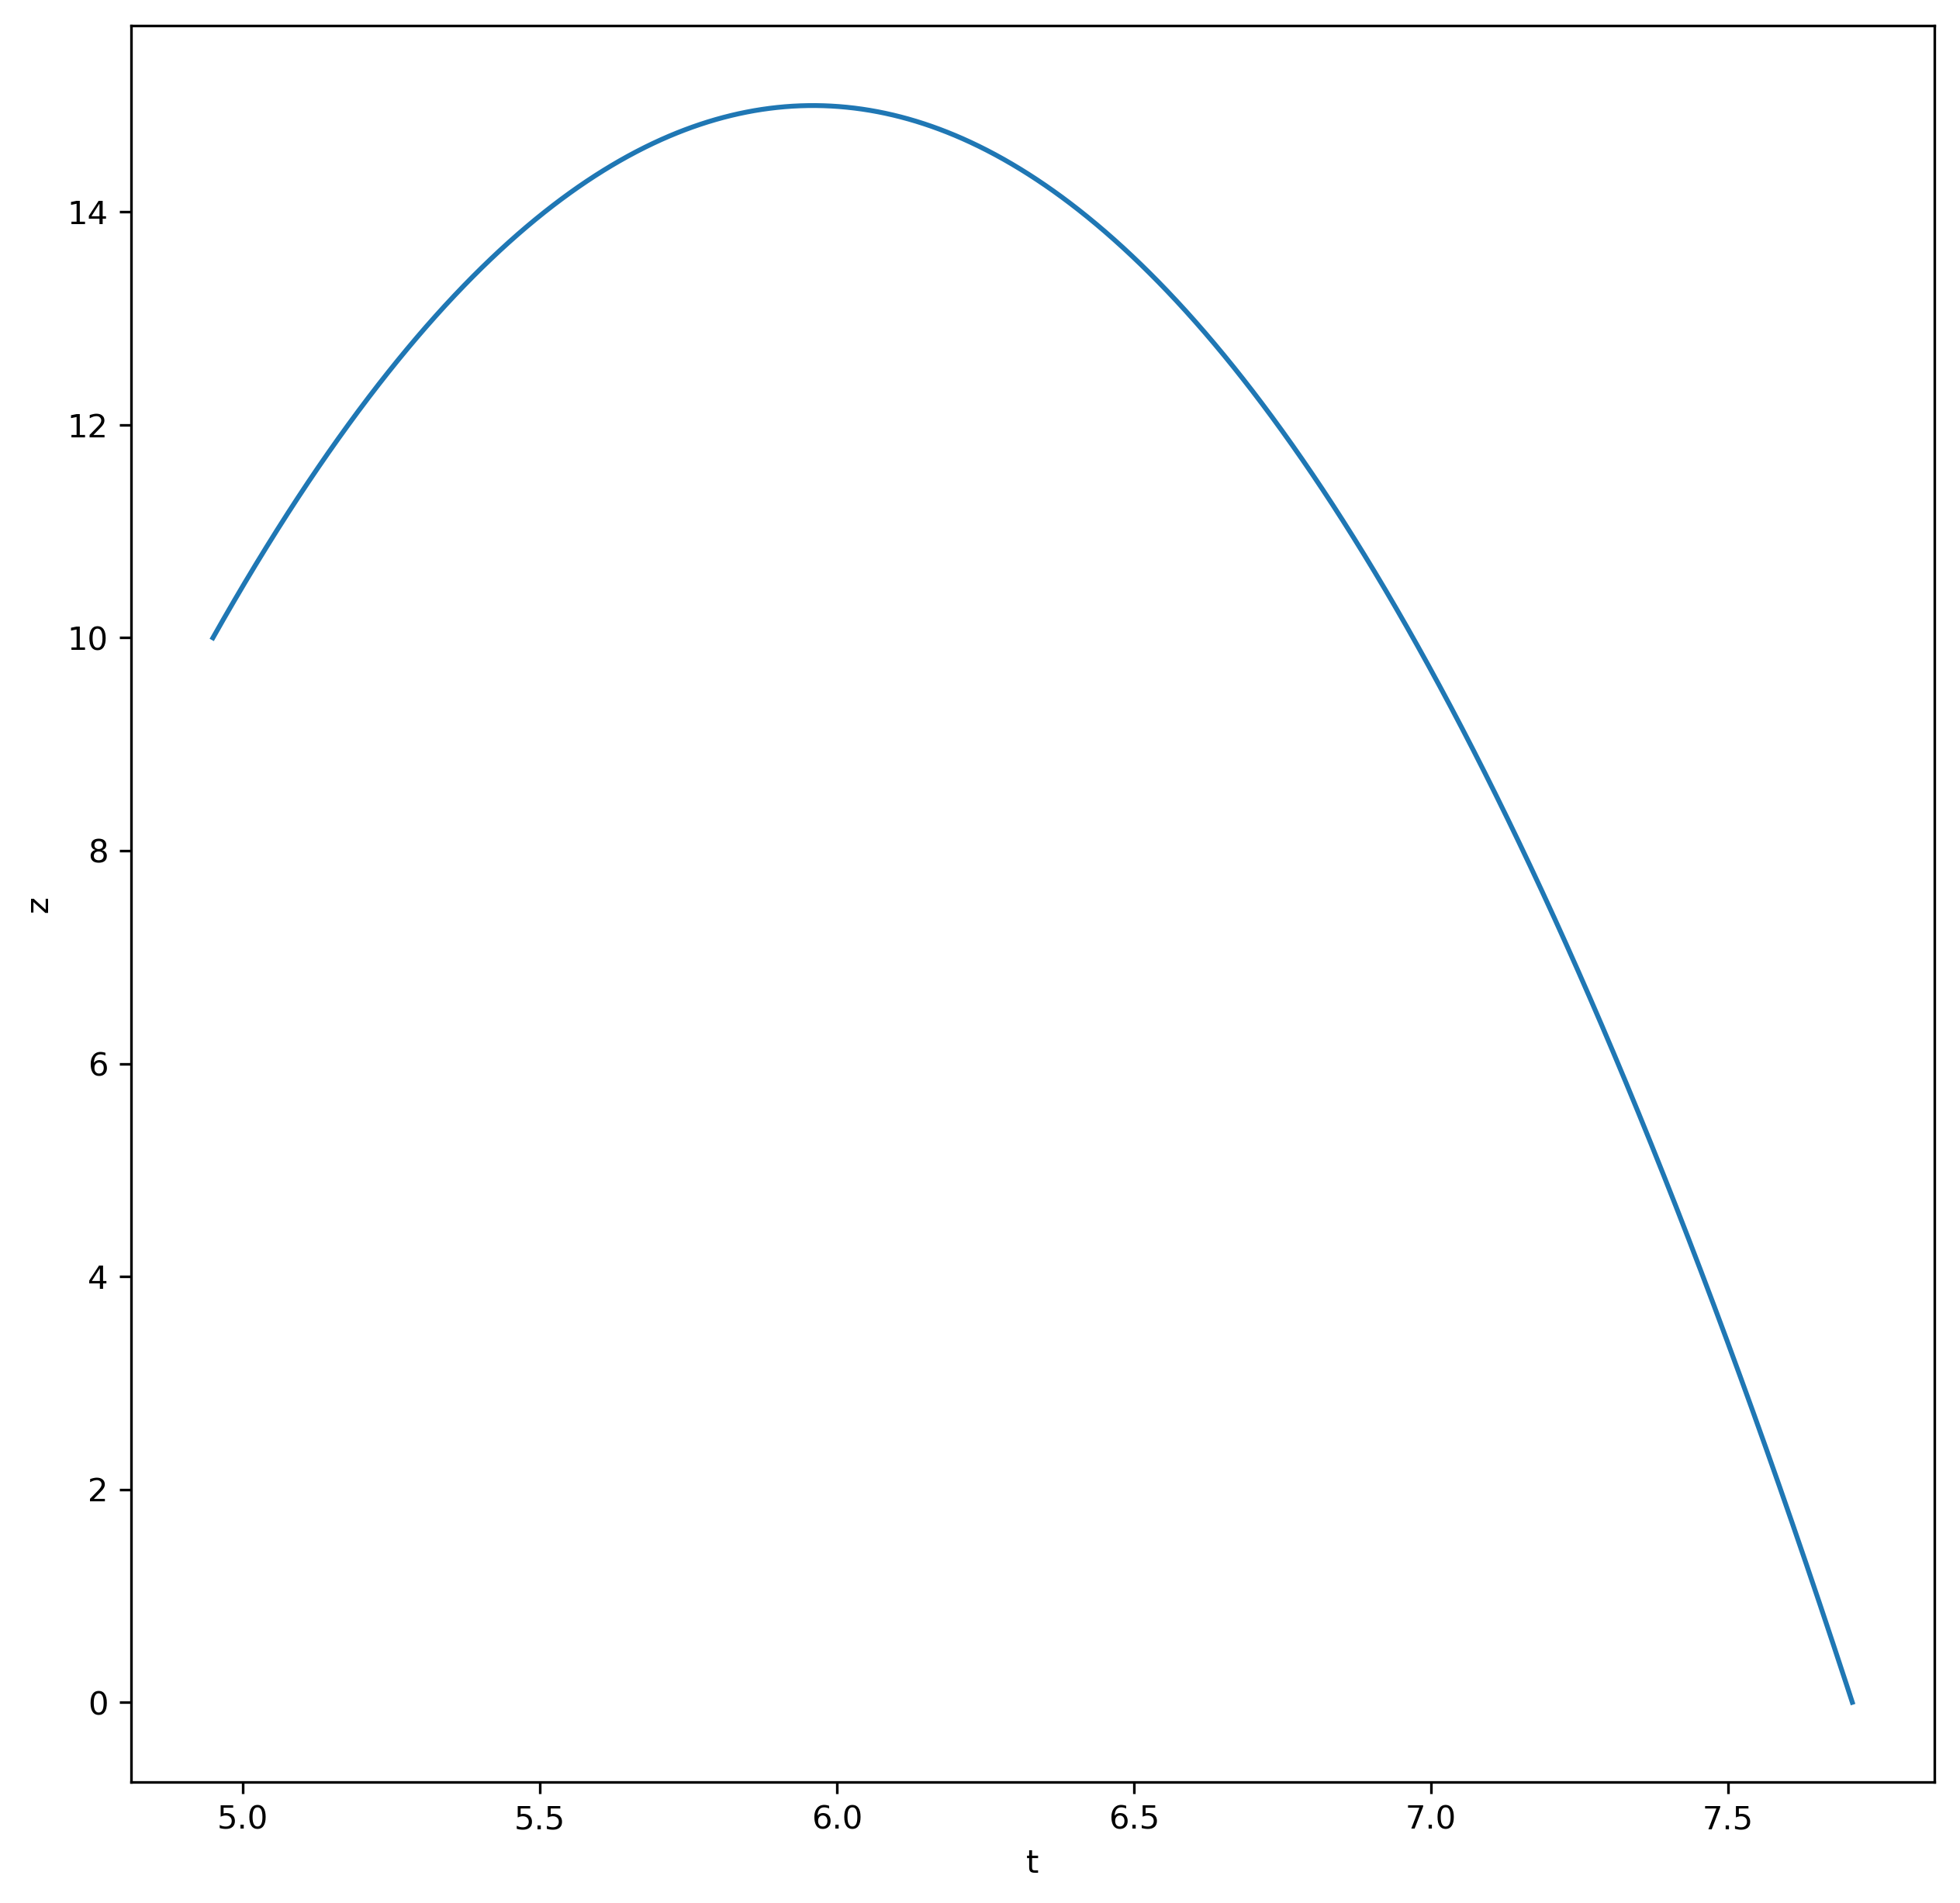

In [6]:
plt.figure(figsize=(10,10),dpi=300)
plt.plot(mot[0], mot[4])
plt.xlabel('t')
plt.ylabel('z')
plt.show()

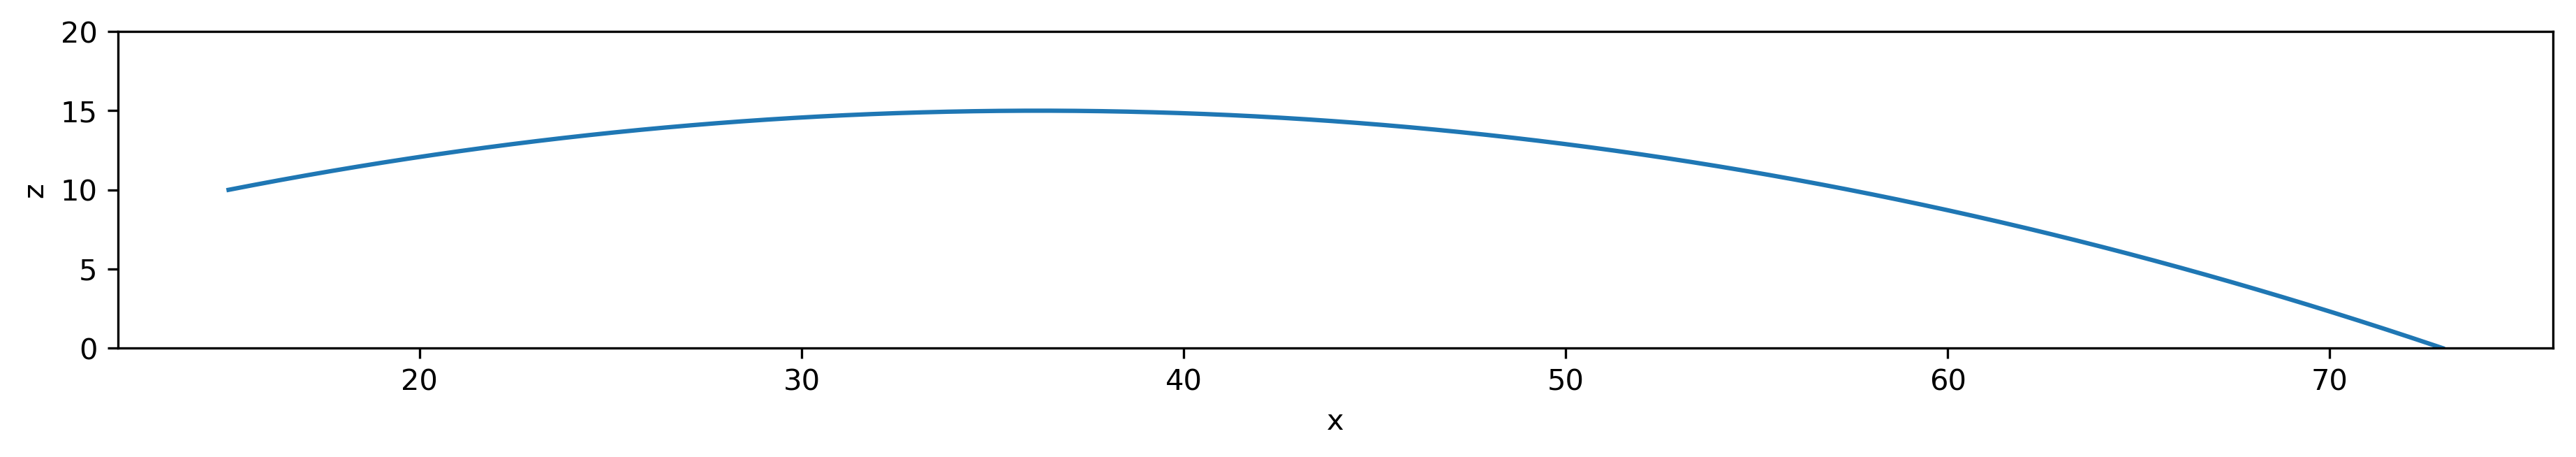

In [7]:
plt.figure(figsize=(15,2),dpi=300)
plt.plot(mot[3], mot[4])
plt.ylim(0,20)
plt.xlabel('x')
plt.ylabel('z')
plt.show()